In [1]:
!pip install fbprophet

     |████████████████████████████████| 54 kB 540 kB/s eta 0:00:011
     |████████████████████████████████| 1.9 MB 600 kB/s eta 0:00:01
     |████████████████████████████████| 16.2 MB 25.3 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 3.3 MB/s  eta 0:00:01
     |████████████████████████████████| 110 kB 22.2 MB/s eta 0:00:01
     |████████████████████████████████| 823 kB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 732 kB 17.7 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/rachaelmclaughlin/opt/anaconda3/envs/PythonData/bin/python3.8 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/df/8ygzmzs151n_24v52grggx780000gp/T/pip-install-y46olh32/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/df/8ygzmzs151n_24v52grggx780000gp/T/pip-install-y46olh32/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.clos

  Created wheel for holidays: filename=holidays-0.10.2-py3-none-any.whl size=111560 sha256=e564265e74fcd3b88d4101a38f333dec900dd5f489b55482227c2b902629096f
  Stored in directory: /Users/rachaelmclaughlin/Library/Caches/pip/wheels/21/02/81/a57f54bf80a21ed502a48aac7f9737296463648f30bb446c27
  Created wheel for pymeeus: filename=PyMeeus-0.3.7-py3-none-any.whl size=702876 sha256=f0e47e69cd07fca35ef6d5407e09dfb3d567cb0e0993b66333b0f453c0b966d4
  Stored in directory: /Users/rachaelmclaughlin/Library/Caches/pip/wheels/5a/68/50/d989a005ecd4f58a7922bede25ff7e391d66395a3090acf97a
Successfully built holidays pymeeus
Failed to build fbprophet pystan
    Running setup.py install for pystan ... done
    Running setup.py install for fbprophet ... done


In [36]:
import pandas as pd
from fbprophet import Prophet
import datetime


In [37]:
df = pd.read_csv('raw_files/sale_prices_state.csv')
df.head()

,Date,CA,TX,NY,FL,IL,PA,OH,MI,GA,...,NH,RI,MT,DE,SD,AK,ND,VT,DC,WY
0,1/31/1996,162238,97631,139108,100595,139112,96300,92098,90643,102841,...,106348,126677,NaN,131960,84389,125190,NaN,108750,166900,NaN
1,2/29/1996,162008,97656,138793,100691,138861,96233,92209,90966,103000,...,106046,126771,NaN,131905,84783,125611,NaN,108738,166140,NaN
2,3/31/1996,161859,97684,138607,100803,138544,96166,92355,91276,103162,...,105841,126766,NaN,131845,84745,125886,NaN,108650,165469,NaN
3,4/30/1996,161569,97811,138327,101013,138172,96057,92659,91942,103513,...,105510,126770,NaN,131703,84802,126559,NaN,108515,164321,NaN
4,5/31/1996,161373,97948,138224,101215,137661,95958,92975,92599,103865,...,105492,126606,NaN,131818,84595,127077,NaN,108331,163420,NaN


In [38]:
df = df.rename(columns = {'Date':'ds', 'TX':'y'})
df.head()

,ds,CA,y,NY,FL,IL,PA,OH,MI,GA,...,NH,RI,MT,DE,SD,AK,ND,VT,DC,WY
0,1/31/1996,162238,97631,139108,100595,139112,96300,92098,90643,102841,...,106348,126677,NaN,131960,84389,125190,NaN,108750,166900,NaN
1,2/29/1996,162008,97656,138793,100691,138861,96233,92209,90966,103000,...,106046,126771,NaN,131905,84783,125611,NaN,108738,166140,NaN
2,3/31/1996,161859,97684,138607,100803,138544,96166,92355,91276,103162,...,105841,126766,NaN,131845,84745,125886,NaN,108650,165469,NaN
3,4/30/1996,161569,97811,138327,101013,138172,96057,92659,91942,103513,...,105510,126770,NaN,131703,84802,126559,NaN,108515,164321,NaN
4,5/31/1996,161373,97948,138224,101215,137661,95958,92975,92599,103865,...,105492,126606,NaN,131818,84595,127077,NaN,108331,163420,NaN


In [39]:
df.dtypes

ds     object
CA      int64
y       int64
NY      int64
FL      int64
IL      int64
PA      int64
OH      int64
MI      int64
GA      int64
NC      int64
NJ      int64
VA      int64
WA      int64
MA      int64
IN      int64
AZ      int64
TN      int64
MO      int64
MD      int64
WI      int64
MN      int64
CO      int64
AL      int64
SC      int64
LA      int64
KY      int64
OR      int64
OK      int64
CT      int64
IA      int64
MS      int64
AR      int64
KS      int64
UT      int64
NV      int64
NM    float64
WV      int64
NE      int64
ID      int64
HI      int64
ME      int64
NH      int64
RI      int64
MT    float64
DE      int64
SD      int64
AK      int64
ND    float64
VT      int64
DC      int64
WY    float64
dtype: object

In [40]:
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df.head()

,ds,CA,y,NY,FL,IL,PA,OH,MI,GA,...,NH,RI,MT,DE,SD,AK,ND,VT,DC,WY
0,1996-01-31,162238,97631,139108,100595,139112,96300,92098,90643,102841,...,106348,126677,NaN,131960,84389,125190,NaN,108750,166900,NaN
1,1996-02-29,162008,97656,138793,100691,138861,96233,92209,90966,103000,...,106046,126771,NaN,131905,84783,125611,NaN,108738,166140,NaN
2,1996-03-31,161859,97684,138607,100803,138544,96166,92355,91276,103162,...,105841,126766,NaN,131845,84745,125886,NaN,108650,165469,NaN
3,1996-04-30,161569,97811,138327,101013,138172,96057,92659,91942,103513,...,105510,126770,NaN,131703,84802,126559,NaN,108515,164321,NaN
4,1996-05-31,161373,97948,138224,101215,137661,95958,92975,92599,103865,...,105492,126606,NaN,131818,84595,127077,NaN,108331,163420,NaN


In [ ]:
#need to convert date to YYYY-MM-DD with column as ds and one state as y (start with TX)

In [41]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
651,2021-03-27
652,2021-03-28
653,2021-03-29
654,2021-03-30
655,2021-03-31


In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
651,2021-03-27,226582.485989,224740.875945,228388.035033
652,2021-03-28,226394.032925,224586.784371,228171.230954
653,2021-03-29,226128.804883,224301.518914,227910.666799
654,2021-03-30,225793.249293,223848.316428,227521.810786
655,2021-03-31,225395.742409,223560.066672,227021.084956


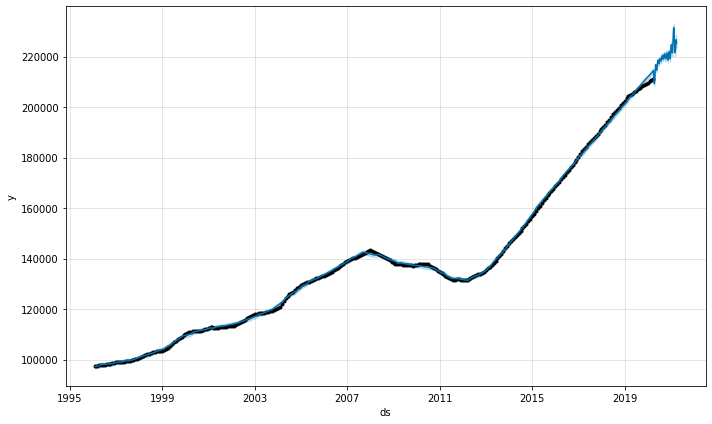

In [44]:
fig1 = m.plot(forecast)

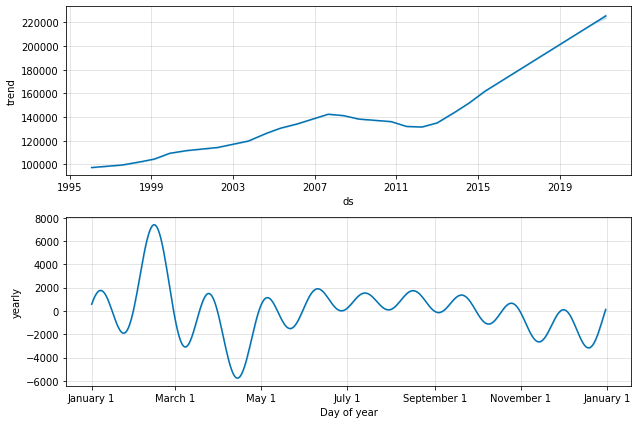

In [45]:
fig2 = m.plot_components(forecast)


In [46]:
#did not do this step yet since not sure it's necessary to have interactive graph per our convo with Manny
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

ModuleNotFoundError: No module named 'plotly'

In [49]:
import pickle
pkl_path = "TX.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)

# save the dataframe
forecast.to_pickle("TX.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [50]:
forecast.to_csv("TX.csv")

In [ ]:
# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

fcast = pd.read_pickle("path/to/data/forecast.pkl")

In [ ]:
#Top Populated States
# California (Population: 39,747,267)
# Texas (Population: 29,087,070)
# Florida (Population: 21,646,155)
# New York (Population: 19,491,339)
# Pennsylvania (Population: 12,813,969)
#https://worldpopulationreview.com/states

In [ ]:
#Bottom Populated States
# Wyoming (Population: 572,381)
# Vermont (Population: 627,180)
# District of Columbia (Population: 711,571)
# Alaska (Population: 735,720)
# North Dakota (Population: 760,900)